# Machine Learning - Regression example

###### House prices dataset (Kaggle)  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### 0 - Setup

###### Import pckgs

In [65]:
from ml_utils import *
import warnings
warnings.filterwarnings("ignore")

###### Import data

In [2]:
dtf = pd.read_csv("data_houses.csv")
dtf = dtf[dtf.columns.tolist()[0:12]+dtf.columns.tolist()[-1:]]
dtf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,250000


shape: (1460, 13)
Id --> Nas: 0 (0.0%)
    # possible pk
MSSubClass --> Nas: 0 (0.0%)
MSZoning --> Nas: 0 (0.0%)
LotFrontage --> Nas: 259 (17.7%)
LotArea --> Nas: 0 (0.0%)
Street --> Nas: 0 (0.0%)
Alley --> Nas: 1369 (93.8%)
LotShape --> Nas: 0 (0.0%)
LandContour --> Nas: 0 (0.0%)
Utilities --> Nas: 0 (0.0%)
LotConfig --> Nas: 0 (0.0%)
LandSlope --> Nas: 0 (0.0%)
SalePrice --> Nas: 0 (0.0%)


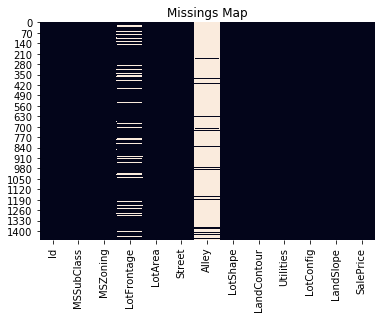

In [3]:
check_Nas(dtf, plot="map")

### 1 - Data Analysis

###### Group variables by type
- pk: Id
- y: SalePrice
- num: LotFrontage, LotArea
- cat: MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope

In [4]:
features = []

###### Target Variable

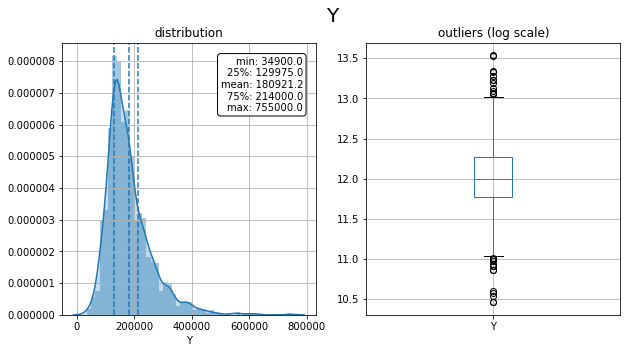

In [5]:
dtf = dtf.rename(columns={"SalePrice":"Y"})

freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

In [6]:
#-> Average House price: 180,921

###### Numeric

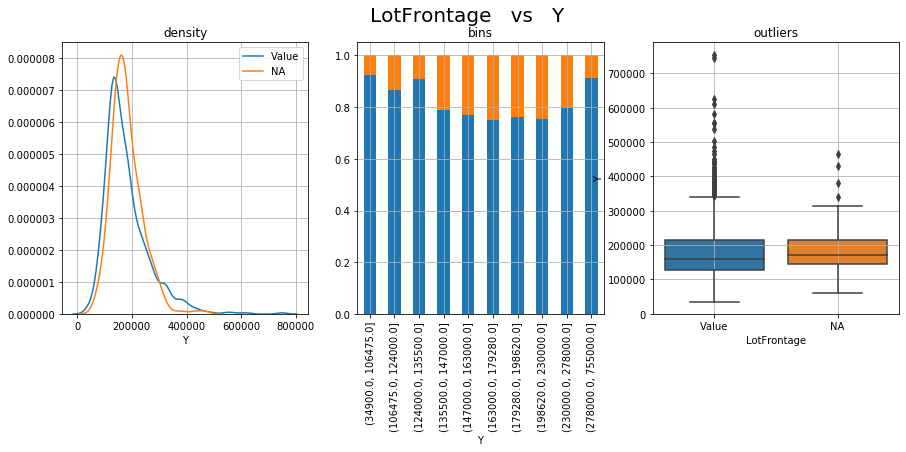

In [7]:
#--- LotFrontage ---#
nan_analysis(dtf, na_x="LotFrontage", y="Y", max_cat=20, figsize=(15,5))

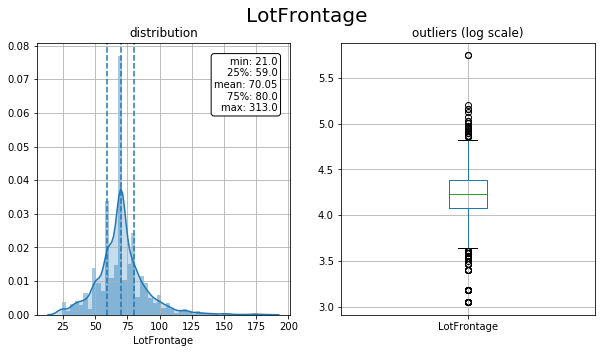

In [8]:
freqdist_plot(dtf, "LotFrontage", box_logscale=True, figsize=(10,5))

In [9]:
dtf["LotFrontage"] = dtf["LotFrontage"].fillna( dtf["LotFrontage"].mean() )

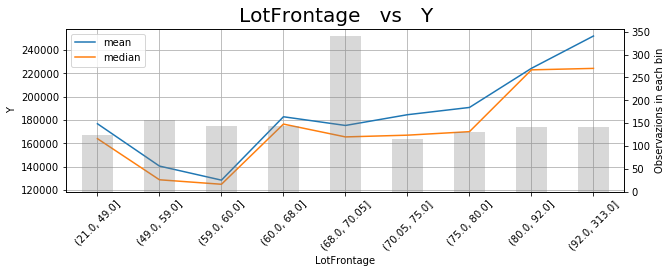

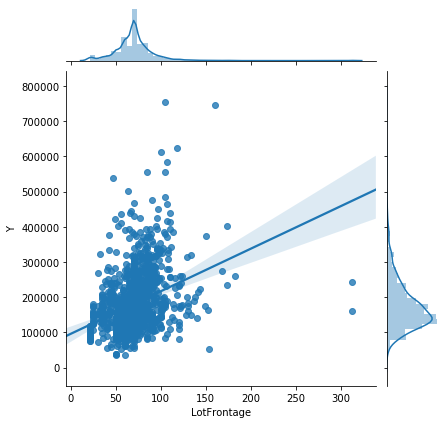

In [10]:
bivariate_plot(dtf, x="LotFrontage", y="Y", figsize=(10,3))

In [11]:
#-> LotFrontage is Predictive: the larger is the street connected to property the higher is the house price.
features.append("LotFrontage")

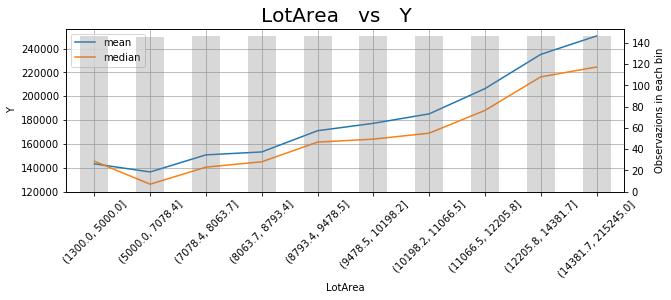

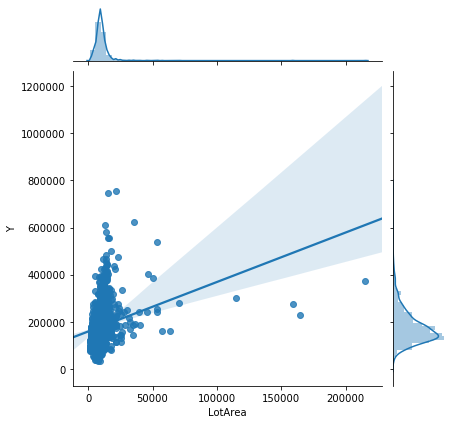

In [12]:
#--- LotArea ---#
bivariate_plot(dtf, x="LotArea", y="Y", figsize=(10,3))

In [13]:
#-> LotArea is Predictive: the larger is the lot area the higher is the house price.
features.append("LotArea")

###### Categorical

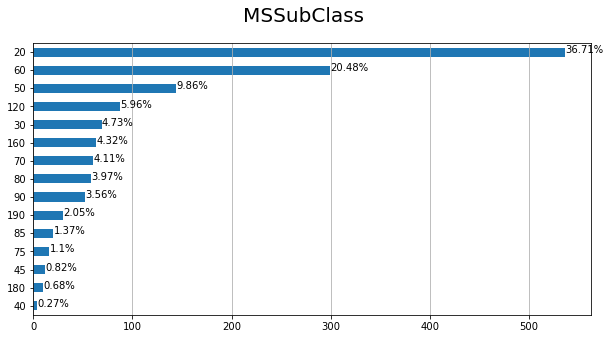

In [14]:
#--- MSSubClass ---#
freqdist_plot(dtf, "MSSubClass", figsize=(10,5))

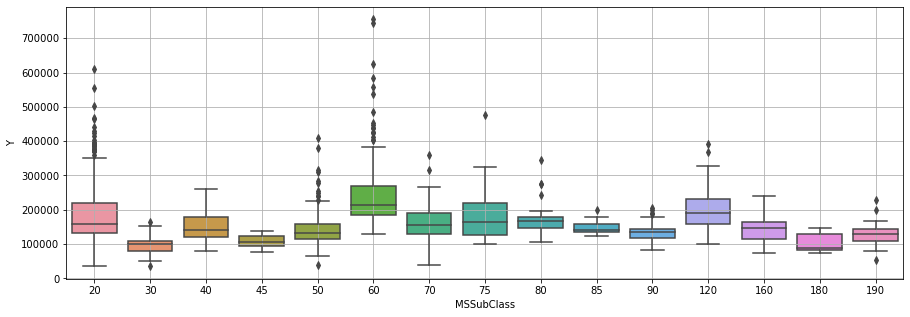

In [15]:
# this variable is tricky as it has 15 classes, so I will plot manually in a unique big boxplot
fig, ax = plt.subplots(figsize=(15,5))
sns.catplot(x="MSSubClass", y="Y", data=dtf, kind="box", ax=ax)
ax.grid(True)
plt.close()

In [16]:
MSSubClass_clusters = {"min":[30,45,180], "max":[60,120], "mean":[]}

dtf = add_feature_clusters(dtf, "MSSubClass", dic_cluters=MSSubClass_clusters, dropx=False)

dtf[["Id","MSSubClass","MSSubClass_cluster","Y"]].head()

,Id,MSSubClass,MSSubClass_cluster,Y
0,1,60,max,208500
1,2,20,mean,181500
2,3,60,max,223500
3,4,70,mean,140000
4,5,60,max,250000


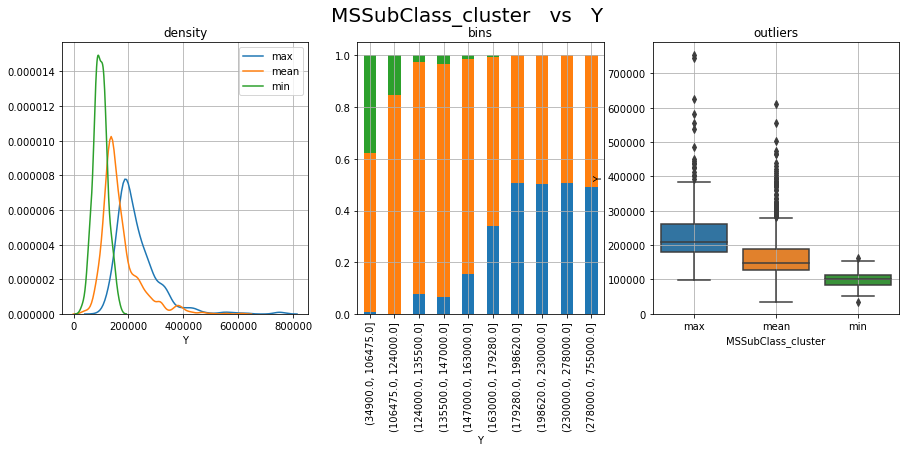

In [17]:
bivariate_plot(dtf, x="MSSubClass_cluster", y="Y", figsize=(15,5))

In [18]:
#-> MSSubClass_cluster is Predictive: different lot classes (clusters) lead to different house prices.
features.append("MSSubClass_cluster")

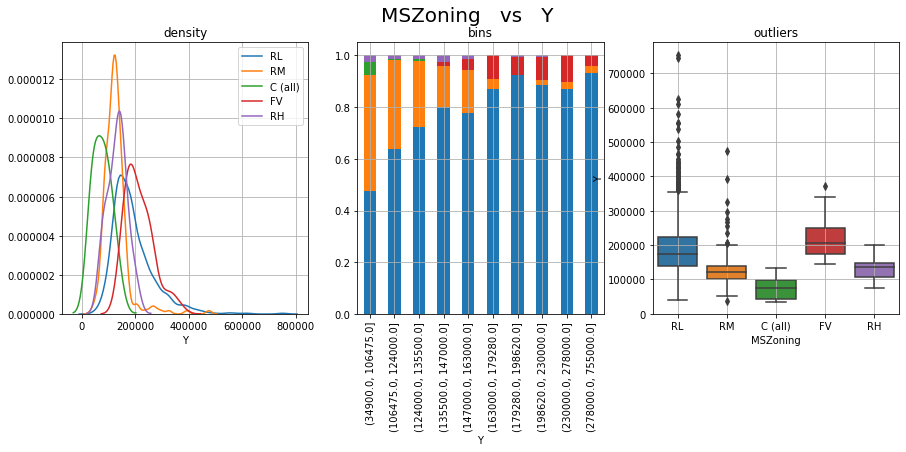

In [19]:
#--- MSZoning ---#
bivariate_plot(dtf, x="MSZoning", y="Y", figsize=(15,5))

In [20]:
#-> MSZoning is Predictive: different zones have different price distributions.
features.append("MSZoning")

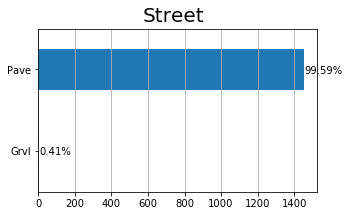

In [21]:
#--- Street ---#
freqdist_plot(dtf, "Street", figsize=(5,3))

In [22]:
#-> Street is useless

In [23]:
#--- Alley ---#
#-> Alley is useless (96% of Nan)

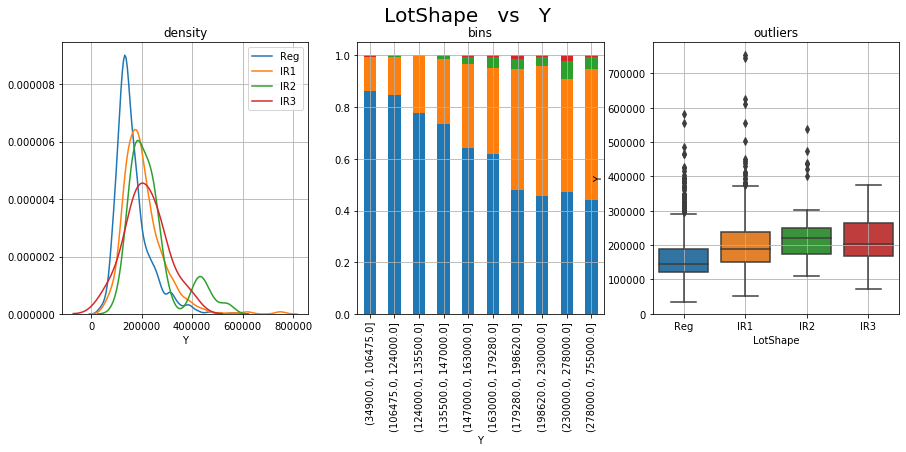

In [24]:
#--- LotShape ---#
bivariate_plot(dtf, x="LotShape", y="Y", figsize=(15,5))

In [25]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LotShape", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [26]:
#-> LotShape is predictive: for sure IR2 has a different distribution and higher prices, while Reg has lower prices. 
# Plus the correlation test had a positive result, thus I'll keep the variable for now.
features.append("LotShape")

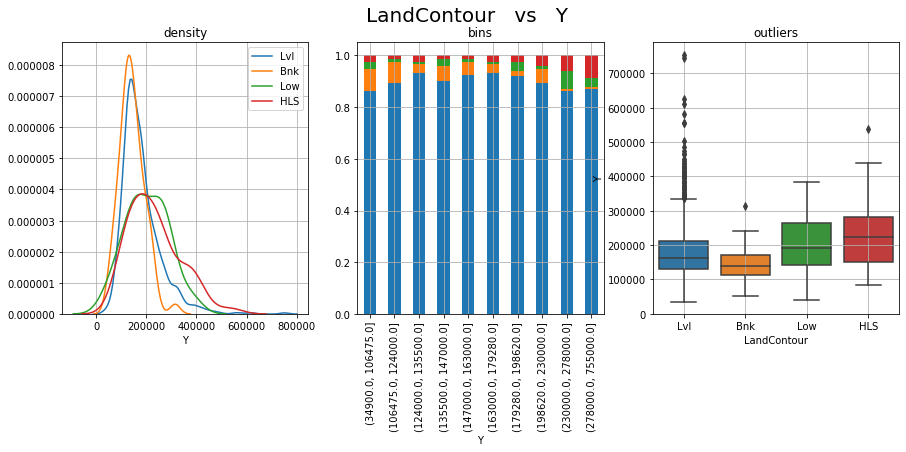

In [27]:
#--- LandContour ---#
bivariate_plot(dtf, x="LandContour", y="Y", figsize=(15,5))

In [28]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LandContour", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [29]:
#-> LandContour is predictive.
features.append("LandContour")

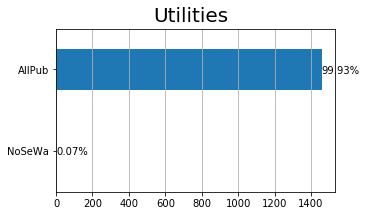

In [30]:
#--- Utilities ---#
freqdist_plot(dtf, "Utilities", figsize=(5,3))

In [31]:
#-> Utilities is useless

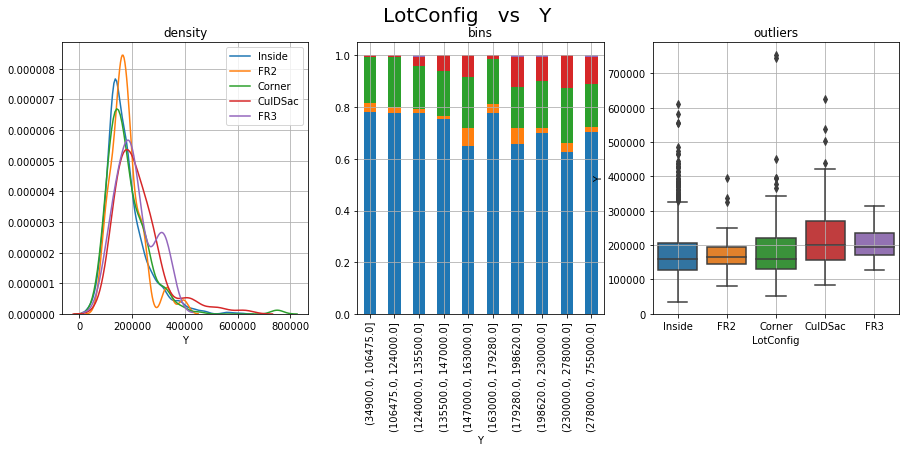

In [32]:
#--- LotConfig ---#
bivariate_plot(dtf, x="LotConfig", y="Y", figsize=(15,5))

In [33]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LotConfig", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [34]:
#-> LotConfig is predictive.
features.append("LotConfig")

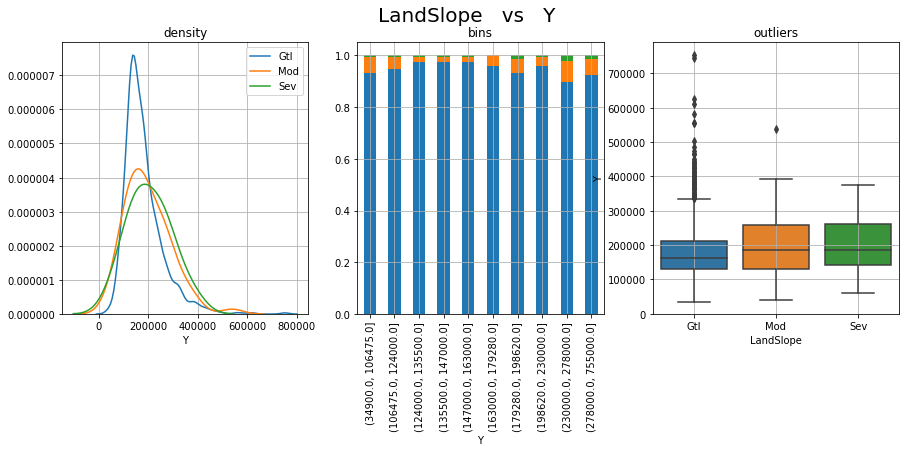

In [35]:
#--- LandSlope ---#
bivariate_plot(dtf, x="LandSlope", y="Y", figsize=(15,5))

In [36]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LandSlope", y="Y")

Anova F: the variables are Non-Correlated (p-value: 0.141)


In [37]:
#-> LandSlope is useless

###### Summary

In [38]:
dtf = dtf[["Id"]+features+["Y"]]
dtf.head()

,Id,LotFrontage,LotArea,MSSubClass_cluster,MSZoning,LotShape,LandContour,LotConfig,Y
0,1,65.0,8450,max,RL,Reg,Lvl,Inside,208500
1,2,80.0,9600,mean,RL,Reg,Lvl,FR2,181500
2,3,68.0,11250,max,RL,IR1,Lvl,Inside,223500
3,4,60.0,9550,mean,RL,IR1,Lvl,Corner,140000
4,5,84.0,14260,max,RL,IR1,Lvl,FR2,250000


### 2 - Preprocessing

###### To do:
- treat missings
- encode categorical data
- partitioning dataset
- scaling features and target

In [39]:
check = data_preprocessing(dtf, pk="Id", y="Y", task="regression",
                           processNas=None, processCategorical=None, split=None, scale=None)

--- check missing ---
   OK: No missing
--- check categorical data ---
--- split train/test ---
   OK: skipped this step
--- scaling ---
   OK: skipped this step


###### Nas

In [40]:
# ok, no missings

###### Categorical

In [41]:
dtf = add_dummies(dtf, x="MSSubClass_cluster", dropx=True)

In [42]:
dtf = add_dummies(dtf, x="MSZoning", dropx=True)

In [43]:
dtf = add_dummies(dtf, x="LotShape", dropx=True)

In [44]:
dtf = add_dummies(dtf, x="LandContour", dropx=True)

In [45]:
dtf = add_dummies(dtf, x="LotConfig", dropx=True)

### 3 - Baseline (linear regression)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Partitioning train/test
- Train model
- Evaluate
- Explainer
- Visualize model

###### Features Selection

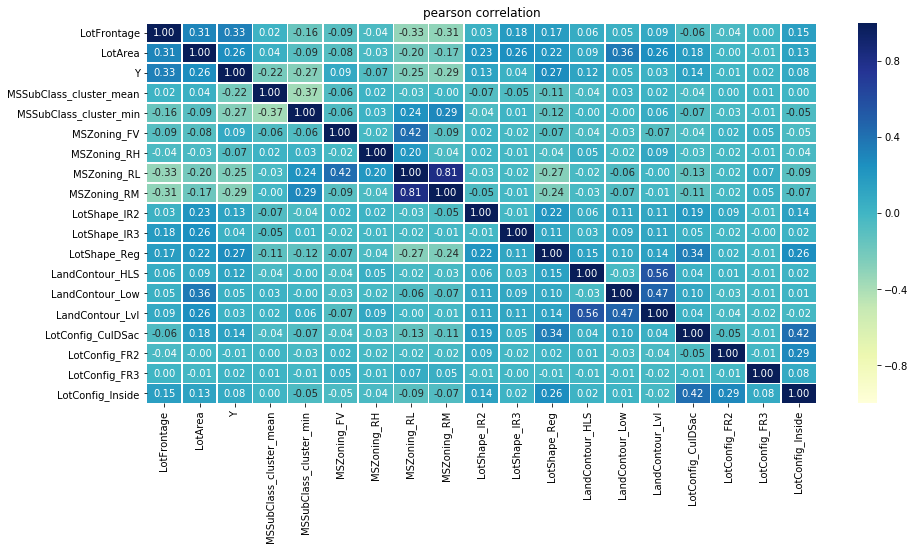

In [46]:
#--- correlation ---#
corr = corrmatrix_plot(dtf.drop("Id",axis=1), method="pearson", annotation=True, figsize=(15,7))

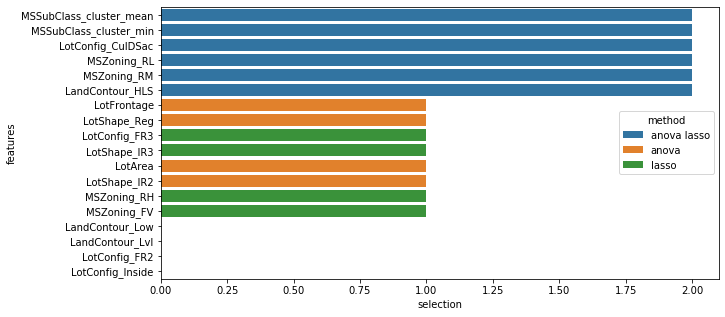

In [47]:
#--- p values ---#
dic_feat_sel = features_selection(dtf.drop("Id",axis=1), y="Y", task="regression", top=10, figsize=(10,5))

--- model used ---
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


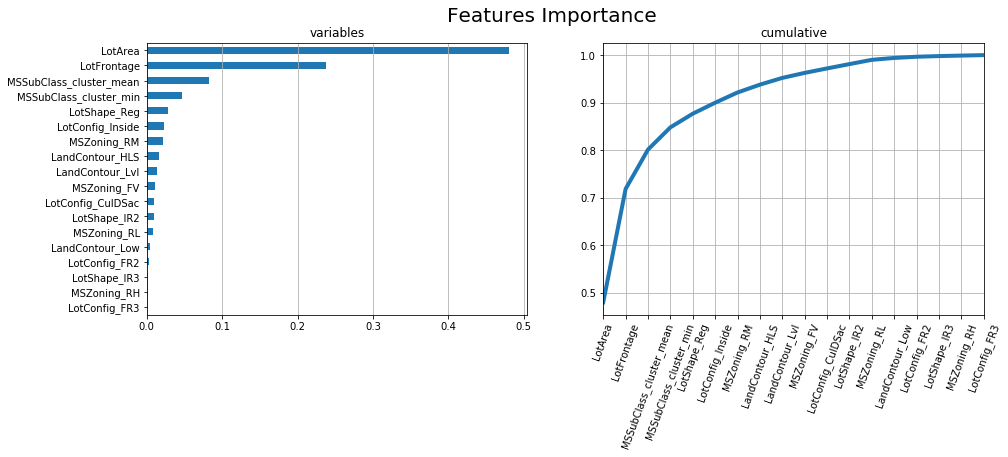

In [48]:
#--- importance ---#
model = ensemble.RandomForestRegressor(n_estimators=100, criterion="mse", random_state=0)

feat_imp = features_importance(X=dtf.drop(["Id","Y"], axis=1).values, y=dtf["Y"].values, 
                               X_names=dtf.drop(["Id","Y"], axis=1).columns.tolist(), 
                               model=model, task="regression", figsize=(15,5))

In [49]:
# -> selection
selected_features = ["LotArea","LotFrontage","MSSubClass_cluster_mean","MSSubClass_cluster_min","LotShape_Reg",
                     "LotConfig_Inside","MSZoning_RM","LandContour_HLS","LandContour_Lvl",
                     "MSZoning_FV","LotConfig_CulDSac","LotShape_IR2"]

In [50]:
dtf_reduced = dtf[["Id"]+selected_features+["Y"]] if len(selected_features)>0 else dtf
dtf_reduced.head()

,Id,LotArea,LotFrontage,MSSubClass_cluster_mean,MSSubClass_cluster_min,LotShape_Reg,LotConfig_Inside,MSZoning_RM,LandContour_HLS,LandContour_Lvl,MSZoning_FV,LotConfig_CulDSac,LotShape_IR2,Y
0,1,8450,65.0,0,0,1,1,0,0,1,0,0,0,208500
1,2,9600,80.0,1,0,1,0,0,0,1,0,0,0,181500
2,3,11250,68.0,0,0,0,1,0,0,1,0,0,0,223500
3,4,9550,60.0,1,0,0,0,0,0,1,0,0,0,140000
4,5,14260,84.0,0,0,0,0,0,0,1,0,0,0,250000


###### Partitioning + Scaling

In [51]:
dic_data = data_preprocessing(dtf_reduced, pk="Id", y="Y", task="regression",
                              processNas=None, processCategorical=None, split=0.3, scale="minmax")

X_names = dic_data["X_names"]
X_train, X_test = dic_data["X"]
y_train, y_test = dic_data["y"]
scalerX, scalerY = dic_data["scaler"]

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
X_train shape: (1022, 12)  | X_test shape: (438, 12)
y_train mean: 181713.25  | y_test mean: 179073.06
12 features: ['LotArea', 'LotFrontage', 'MSSubClass_cluster_mean', 'MSSubClass_cluster_min', 'LotShape_Reg', 'LotConfig_Inside', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Lvl', 'MSZoning_FV', 'LotConfig_CulDSac', 'LotShape_IR2']
--- scaling ---
   OK: scaled all features


###### Train

In [52]:
model = linear_model.LinearRegression()

In [53]:
model, predicted = fit_regr_model(model, X_train, y_train, X_test, scalerY)

###### Evaluate

R2: 0.295
Explained variance: 0.295
Mean Absolute Error: 45018.013
Mean Absolute Error %: 39.695


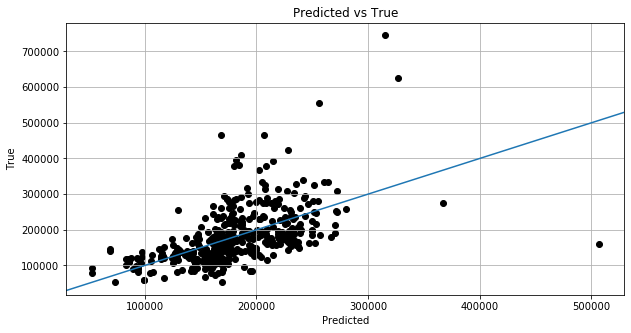

In [54]:
evaluate_regr_model(y_test, predicted, figsize=(10,5))

###### Explainability

True: 87000 --> Pred: [133225.25086878]


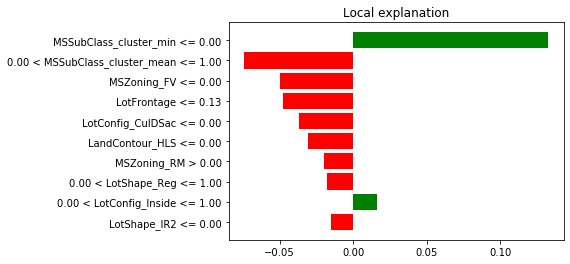

In [55]:
i = 0
print("True:", y_test[0], "--> Pred:", predicted[0])

exp = explainer(X_train, X_names, model, y_train,  X_test_instance=X_test[i], top=10, task="regression")

###### Visualize model

In [56]:
model2d = linear_model.LinearRegression()
model2d.set_params(**model.get_params())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

--- unsupervised: pca ---
--- fitting 2d model ---
--- plotting test set ---


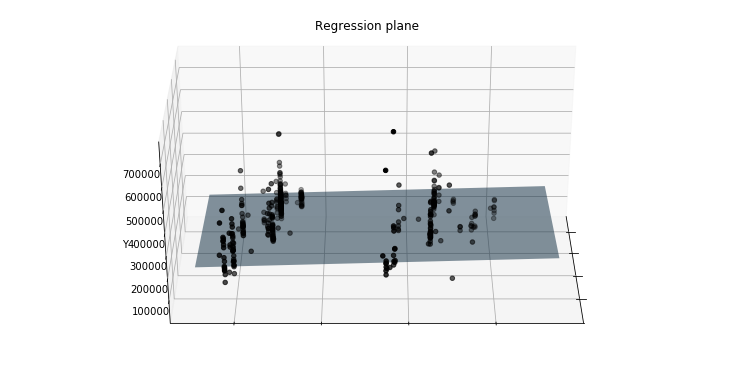

In [57]:
plot3d_regr_model(X_train, y_train, X_test, y_test, scalerY, model2d, rotate=(30,0), figsize=(10,5))

### 4 - Model Desing & Testing (neural network)

###### Plan:
- Partitioning train/test
- Train model
- Evaluate
- Explainer
- Visualize model

###### Partitioning + Scaling

In [58]:
dic_data = data_preprocessing(dtf, pk="Id", y="Y", task="regression",
                              processNas=None, processCategorical=None, split=0.3, scale="minmax")

X_names = dic_data["X_names"]
X_train, X_test = dic_data["X"]
y_train, y_test = dic_data["y"]
scalerX, scalerY = dic_data["scaler"]

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
X_train shape: (1022, 18)  | X_test shape: (438, 18)
y_train mean: 181713.25  | y_test mean: 179073.06
18 features: ['LotFrontage', 'LotArea', 'MSSubClass_cluster_mean', 'MSSubClass_cluster_min', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside']
--- scaling ---
   OK: scaled all features


###### Train

In [93]:
model = models.Sequential()
### layer 1
model.add(layers.Dense(input_dim=18, units=int(round((18+1)/2)), kernel_initializer='normal', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer 2
model.add(layers.Dense(units=int(round((18+1)/2)), kernel_initializer='normal', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer output
model.add(layers.Dense(units=1, kernel_initializer='normal', activation='linear'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


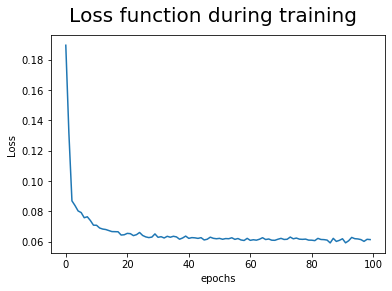

In [60]:
model, predicted = fit_ann_regr(X_train, y_train, X_test, scalerY, model, batch_size=32, epochs=100)

###### Evaluate

R2: 0.253
Explained variance: 0.299
Mean Absolute Error: 41788.814
Mean Absolute Error %: 39.773


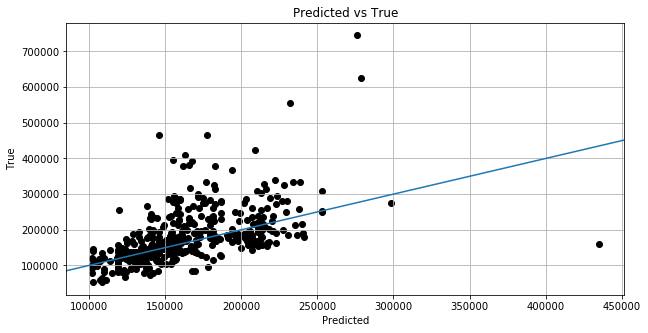

In [61]:
evaluate_regr_model(y_test, predicted, figsize=(10,5))

###### Visualize model

In [62]:
model2d = models.Sequential()
### layer 1
model2d.add(layers.Dense(input_dim=2, units=int(round((18+1)/2)), kernel_initializer='normal', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer 2
model2d.add(layers.Dense(units=int(round((18+1)/2)), kernel_initializer='normal', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer output
model2d.add(layers.Dense(units=1, kernel_initializer='normal', activation='linear'))
model2d.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

--- unsupervised: pca ---
--- fitting 2d model ---
1022/1022 [==============================] - 0s 239us/sample - loss: 0.1829 - mean_absolute_error: 0.1829
--- plotting test set ---


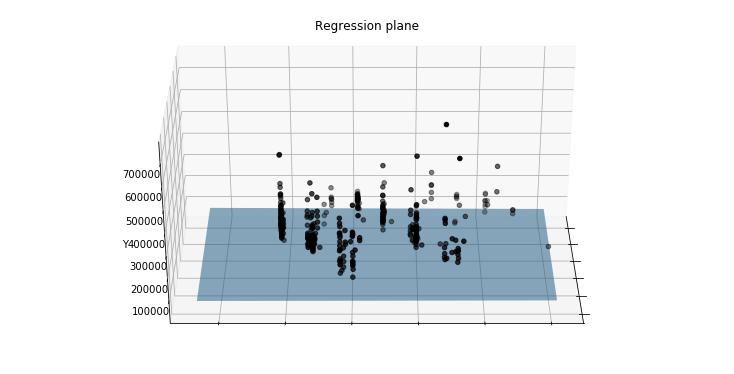

In [63]:
plot3d_regr_model(X_train, y_train, X_test, y_test, scalerY, model2d, rotate=(30,0), figsize=(10,5))

###### Explainability

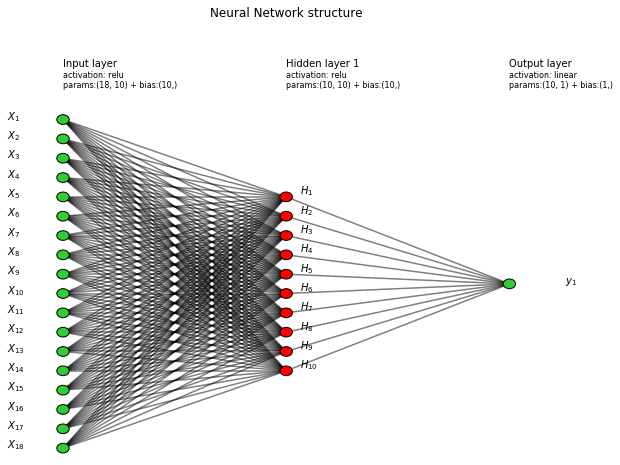

In [94]:
visualize_ann(model, titles=True, figsize=(10,8))